# Node identifier: Machine Learning approach

## Preparation

In [59]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
# Load train and test set
path = 'C:/Users/User/Desktop/Assignatures/Synthesis project/GraphAnomaly/dades_arnau/'

In [61]:
# Use both splits
with open(path + 'balanced_train.pkl', 'rb') as f:
    train_bal = pickle.load(f)
with open(path + 'balanced_test.pkl', 'rb') as f:
    test_bal = pickle.load(f)

with open(path + 'sequential_train.pkl', 'rb') as f:
    train_seq = pickle.load(f)
with open(path + 'sequential_validation.pkl', 'rb') as f:
    test_seq = pickle.load(f)

In [62]:
# Separate labels
def separate_labels(train_set, test_set):
    train_set = train_set.loc[train_set['class'].isin([0, 1])] # Drop unknown
    y_train = list(train_set['class'])
    X_train = train_set.drop(columns=['class'])

    test_set = test_set.loc[test_set['class'].isin([0, 1])] # Drop unknown
    y_test = list(test_set['class'])
    X_test = test_set.drop(columns=['class'])

    return X_train, y_train, X_test, y_test

In [63]:
X_train_bal, y_train_bal, X_test_bal, y_test_bal = separate_labels(train_bal, test_bal)
X_train_seq, y_train_seq, X_test_seq, y_test_seq = separate_labels(train_seq, test_seq)

## Models

In [64]:
def train_model(model, X_train, y_train, X_test, y_test, save=False):
    # If save is True, the model is returned so that it can be further used to classify nodes
    # Train
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)

    # Display results. Except for the accuracy, the others compute the metric for the ilicit class
    print(f"Testing {model}...\n")
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    precision = round(precision_score(y_test, y_pred, pos_label=0), 4)
    print("Precision: {:.2f}%".format(precision * 100))
    recall = round(recall_score(y_test, y_pred, pos_label=0), 4)
    print("Recall: {:.2f}%".format(recall * 100))
    f1 = round(f1_score(y_test, y_pred, pos_label=0),4)
    print("F1 Score: {:.2f}%".format(f1 * 100))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ilicit', 'Licit'])
    disp.plot()
    plt.title(model)
    plt.show()

    if save:
        return model

### Balanced split

Testing DecisionTreeClassifier()...

Accuracy: 96.34%
Precision: 91.06%
Recall: 90.87%
F1 Score: 90.97%


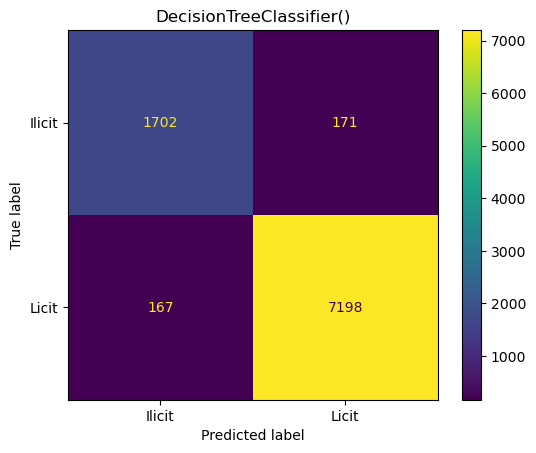

In [65]:
train_model(DecisionTreeClassifier(), X_train_bal, y_train_bal, X_test_bal, y_test_bal)

Testing RandomForestClassifier()...

Accuracy: 98.39%
Precision: 99.54%
Recall: 92.47%
F1 Score: 95.88%


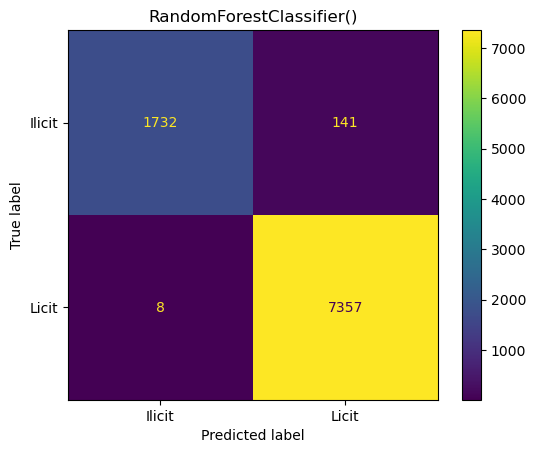

In [66]:
train_model(RandomForestClassifier(), X_train_bal, y_train_bal, X_test_bal, y_test_bal)

### Sequential split

Testing DecisionTreeClassifier()...

Accuracy: 90.56%
Precision: 56.02%
Recall: 75.22%
F1 Score: 64.22%


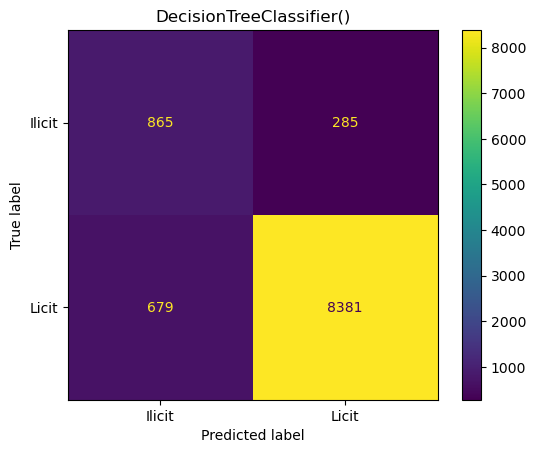

In [67]:
train_model(DecisionTreeClassifier(), X_train_seq, y_train_seq, X_test_seq, y_test_seq)

Testing RandomForestClassifier()...

Accuracy: 98.68%
Precision: 97.39%
Recall: 90.70%
F1 Score: 93.92%


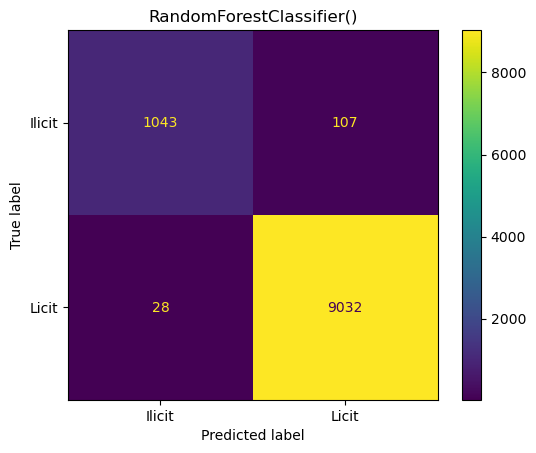

In [68]:
rf_seq = train_model(RandomForestClassifier(), X_train_seq, y_train_seq, X_test_seq, y_test_seq, save=True)

### Save predictions

In [69]:
def predict(df, model):
    temp = df.drop(columns=['class'])
    temp = model.predict(temp)  
    df.insert(loc=2, column='prediction', value=temp)    
    return df

In [70]:
# Note that the model must have been trained on the same split that the dataframe
test_seq_predicted = predict(test_seq, rf_seq)

In [71]:
# Now we would only need to save this new dataset
test_seq_predicted

,node,class,prediction,time step,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,...,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
0,119241681,1,1,30,-0.172856,-0.050065,-0.646376,-0.121970,-0.024025,-0.113002,...,-0.562153,-0.373931,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
1,300325880,2,1,30,-0.172335,-0.109521,1.018602,-0.121970,-0.043875,-0.113002,...,-0.509843,-0.556847,-0.979074,-0.978556,0.018279,-0.049041,-0.038193,-0.011377,-1.760926,-1.760984
2,299089380,2,1,30,-0.056990,-0.172527,0.463609,-0.121970,-0.043875,-0.113002,...,-0.382803,-0.361316,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
3,299140003,2,1,30,-0.165586,-0.168438,0.463609,-0.121970,-0.043875,-0.113002,...,-0.487424,-0.537925,-0.979074,-0.978556,0.018279,-0.068266,-0.084674,-0.054450,1.519700,1.521399
4,298776003,2,1,30,0.409836,-0.168432,1.018602,-0.121970,-0.043875,-0.113002,...,-0.330492,-0.405468,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40794,87028631,2,1,40,0.344238,-0.191242,-0.091383,-0.046932,-0.043875,-0.029140,...,-0.509843,-0.556847,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
40795,13344762,1,1,40,-0.172868,0.048298,-1.201369,0.178180,-0.043875,0.222447,...,0.626045,0.464958,1.461330,1.461369,0.018279,-0.049041,-0.038193,-0.011377,1.519700,1.521399
40796,97425476,1,1,40,-0.172760,0.048298,-1.201369,-0.046932,-0.043875,-0.029140,...,-0.562153,-0.575769,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
40797,97732542,2,1,40,-0.079113,0.055297,1.573595,-0.121970,-0.004174,-0.113002,...,-0.083206,-0.109019,1.063597,0.973384,-0.098889,0.181652,0.340958,0.182454,0.203718,-0.638783


In [75]:
print(test_seq_predicted['class'].value_counts())
print(test_seq_predicted['prediction'].value_counts())

class
2    30589
1     9060
0     1150
Name: count, dtype: int64
prediction
1    36961
0     3838
Name: count, dtype: int64
